In [1]:
import numpy as np
import os
import itertools
import functools
import scienceplots
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
%ls

FlameGraph/           trace.dat               Untitled.ipynb  up-down-2.zip
helpers.sh            trace_download_100.csv  up-down/        up-down.zip
helpers-trace-cmd.sh  trace_upload_100.csv    up-down-2/


In [210]:
names = ['type', 'nflows', 'thread_name', 'core', 'timestamp', 'function', 'start', 'end']
upload = pd.read_csv('trace_download_100.csv', names=names)
upload['start'] = upload['start'].apply(lambda x: int(x, 16))
upload['end'] = upload['end'].apply(lambda x: int(x, 16))
upload['duration'] = upload.end - upload.start
starttime = upload.timestamp.iloc[0]
upload.timestamp = upload.timestamp.apply(lambda x: (x - starttime) * 1e9)
starttime = upload.start.iloc[0]
upload.start = upload.start.apply(lambda x: (x - starttime))
starttime = upload.end.iloc[0]
upload.end = upload.end.apply(lambda x: (x - starttime))

In [211]:
upload.head()

,type,nflows,thread_name,core,timestamp,function,start,end,duration
0,download,100,kworker/16:1-27062,16,0.000000,wg_packet_rx_poll,0,0,800
1,download,100,kworker/9:12-43855,9,1000.000339,wg_packet_rx_poll,-3112,289,4201
2,download,100,kworker/3:17-43821,3,2000.000677,wg_packet_tx_worker,-417,2043,3260
3,download,100,kworker/17:13-43869,17,4000.001354,wg_packet_tx_worker,-1436,4058,6294
4,download,100,kworker/2:5-43577,2,4000.001354,wg_packet_tx_worker,-1477,4212,6489


In [212]:
colors = ['red', 'blue', 'orange', 'green']
functions = ['wg_packet_encrypt_worker', 'wg_packet_decrypt_worker', 'wg_packet_tx_worker', 'wg_packet_rx_poll']
colormap = {f: c for f,c in zip(functions, colors)}

In [213]:
plt.style.use(['science', 'ieee'])

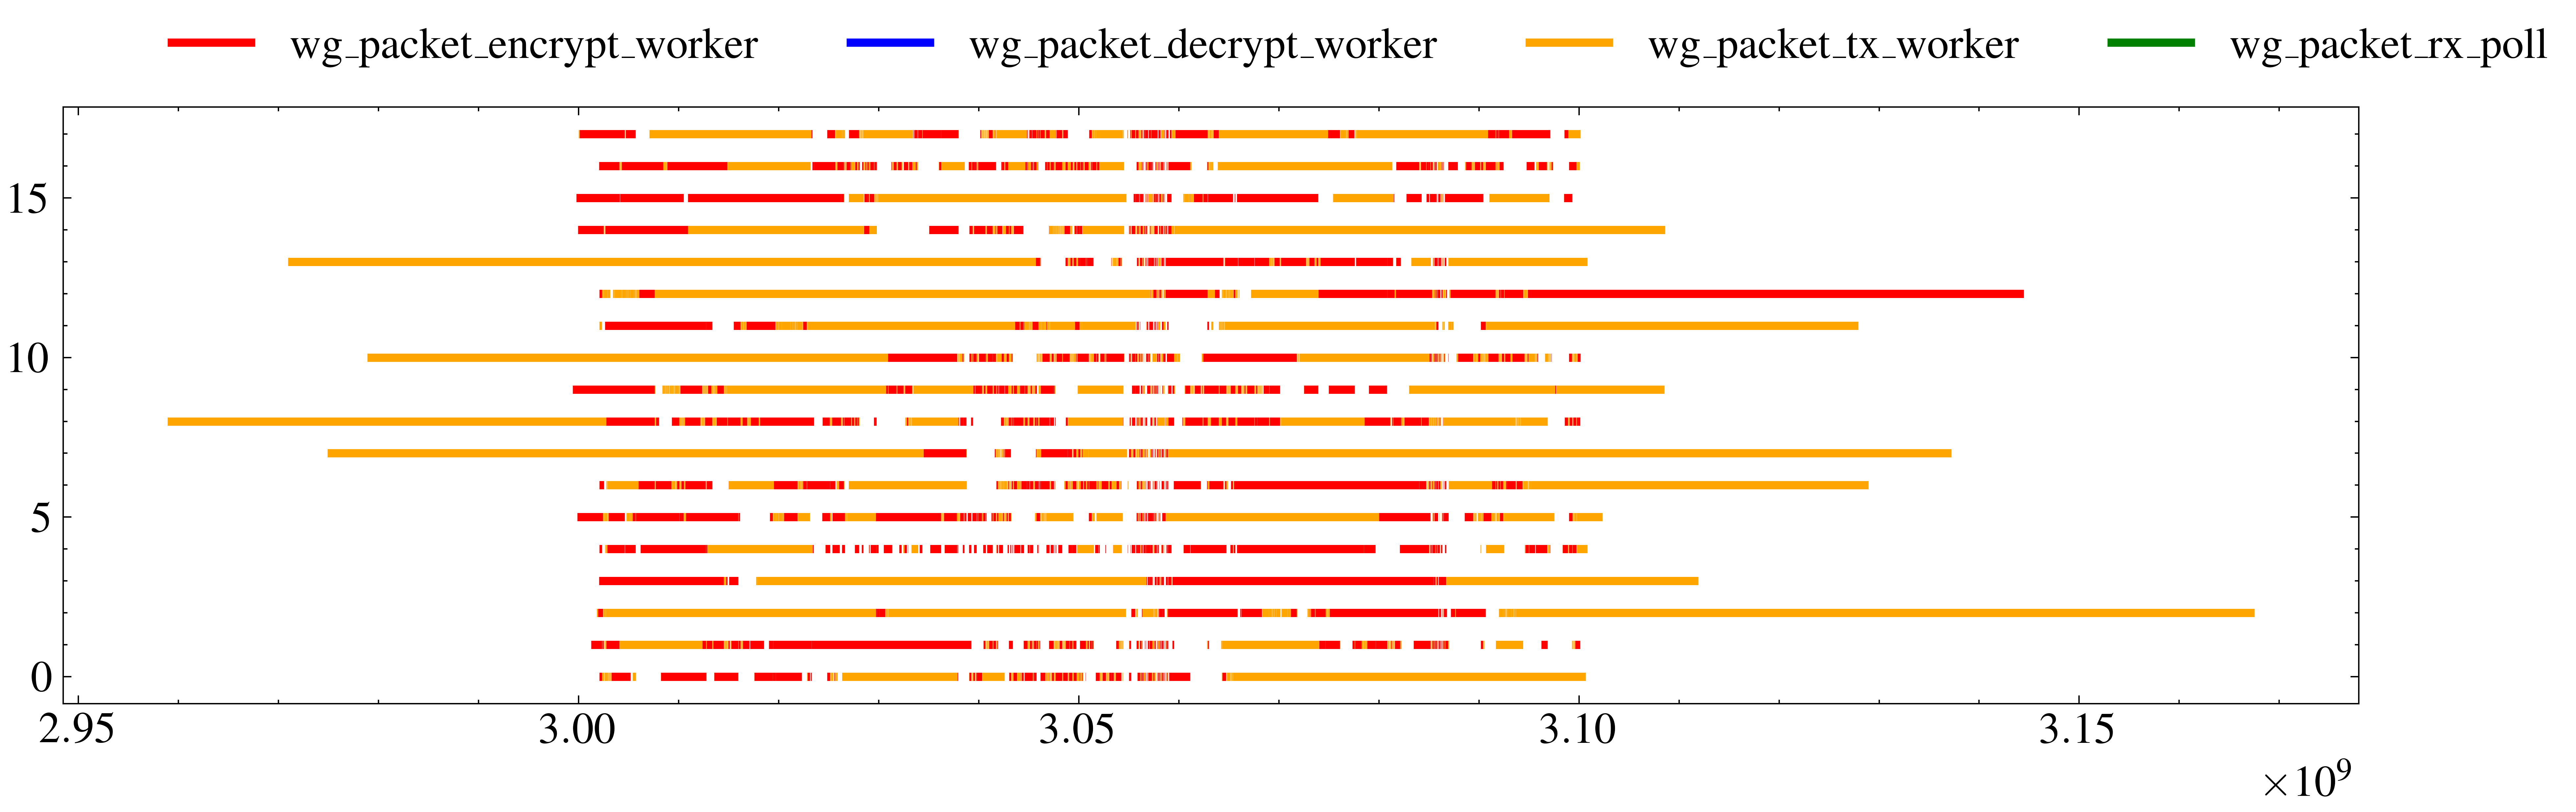

In [216]:
starttime = 3e9
interval_range = 1e8
funcs = ['wg_packet_tx_worker', 'wg_packet_encrypt_worker']
# funcs = functions

df = upload[(upload.start.between(starttime, starttime + interval_range)) | (upload.end.between(starttime, starttime + interval_range))].reset_index(drop=True)
df = df[df.function.isin(funcs)]

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(15, 4))

for i, row in df.iterrows():
    plt.hlines(y=row.core, xmin=row.start, xmax=row.end, color=colormap[row.function], linewidth=3)

legend = plt.legend(functions, bbox_to_anchor=(1.1, 1.2), ncol=4)

for i, color in enumerate(colors):
    legend.get_lines()[i].set_color(color)

count    9.827850e+05
mean     9.401370e+04
std      1.345855e+06
min      5.170000e+02
25%      4.634000e+03
50%      1.174700e+04
75%      3.110400e+04
max      1.466959e+08
Name: duration, dtype: float64

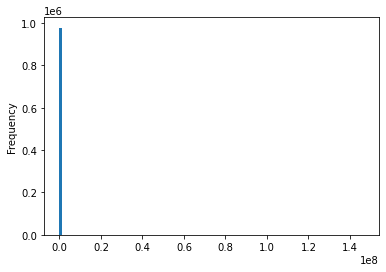

In [180]:
rx_poll = upload[upload.function == 'wg_packet_tx_worker']
rx_poll.duration.plot.hist(bins=100)
rx_poll.duration.describe()